<a href="https://colab.research.google.com/github/PALLADIUM26/ML/blob/main/ML7_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

7.	Using SVM algorithm, predict if a patient has a benign tumor or malignant tumor (cancer) based on the features provided. Use the following kernel for the SVM algorithm:
a) Linear 	b) Polynomial 		c) RBF 	d) Sigmoid
Find the following metrics for each of the SVM algorithms:
1) Accuracy 		2) Recall 		3) Precision 			4) F1-Score
5) Jaccard Score 	6) Error rates		7) Confusion Matrix
Compare all four SVM models using an ROC curve.
		Dataset: samples_cancer.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    jaccard_score, confusion_matrix, roc_curve, auc
)

In [ ]:
# Load dataset
df = pd.read_csv('samples_cancer.csv')
print(df.head())

        ID  Clump  UnifSize  UnifShape  MargAdh  SingEpiSize BareNuc  \
0  1000025      5         1          1        1            2       1   
1  1002945      5         4          4        5            7      10   
2  1015425      3         1          1        1            2       2   
3  1016277      6         8          8        1            3       4   
4  1017023      4         1          1        3            2       1   

   BlandChrom  NormNucl  Mit  Class  
0           3         1    1      2  
1           3         2    1      2  
2           3         1    1      2  
3           3         7    1      2  
4           3         1    1      2  


In [ ]:
# Step 3: Data Preprocessing
# Convert BareNuc to numeric (in case of '?')
df['BareNuc'] = pd.to_numeric(df['BareNuc'], errors='coerce')

In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)

In [ ]:
# Drop the 'ID' column
df.drop(columns=['ID'], inplace=True)

In [ ]:
# Convert target: 2 = Benign (0), 4 = Malignant (1)
df['Class'] = df['Class'].apply(lambda x: 1 if x == 4 else 0)

In [ ]:
# Step 4: Feature Scaling
X = df.drop('Class', axis=1)
y = df['Class']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=4)

In [ ]:
import seaborn as sns
# Step 5: Train and Evaluate SVM Models
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}
fpr_dict, tpr_dict = {}, {}

In [ ]:
for kernel in kernels:
    model = SVC(kernel=kernel, probability=True, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    jaccard = jaccard_score(y_test, y_pred)
    error = 1 - acc
    cm = confusion_matrix(y_test, y_pred)

    results[kernel] = {
        'Accuracy': acc,
        'Recall': rec,
        'Precision': prec,
        'F1-Score': f1,
        'Jaccard Score': jaccard,
        'Error Rate': error,
        'Confusion Matrix': cm
    }
    # ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    fpr_dict[kernel] = fpr
    tpr_dict[kernel] = tpr

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


📌 Kernel: LINEAR
Accuracy: 0.9635
Recall: 1.0000
Precision: 0.9038
F1-Score: 0.9495
Jaccard Score: 0.9038
Error Rate: 0.0365


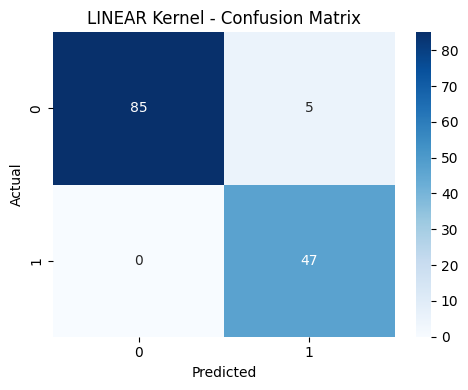


📌 Kernel: POLY
Accuracy: 0.9781
Recall: 0.9787
Precision: 0.9583
F1-Score: 0.9684
Jaccard Score: 0.9388
Error Rate: 0.0219


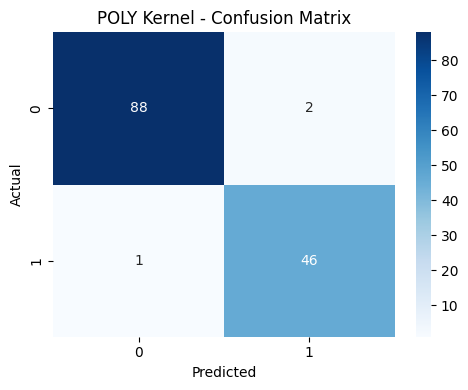


📌 Kernel: RBF
Accuracy: 0.9635
Recall: 1.0000
Precision: 0.9038
F1-Score: 0.9495
Jaccard Score: 0.9038
Error Rate: 0.0365


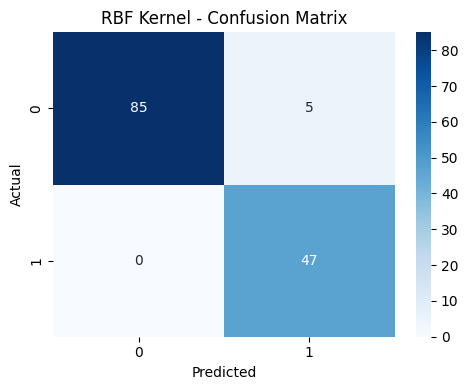


📌 Kernel: SIGMOID
Accuracy: 0.9635
Recall: 1.0000
Precision: 0.9038
F1-Score: 0.9495
Jaccard Score: 0.9038
Error Rate: 0.0365


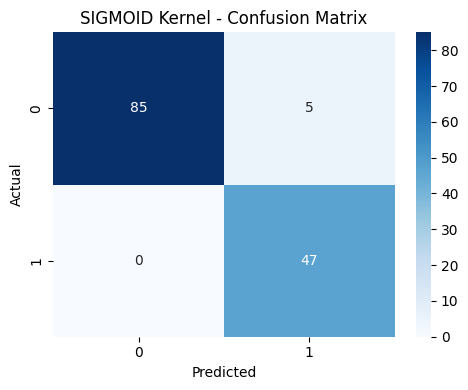

In [ ]:
# Step 6: Display Results with Confusion Matrix Heatmaps
for kernel in results:
    print(f"\n📌 Kernel: {kernel.upper()}")
    for metric, value in results[kernel].items():
        if metric != "Confusion Matrix":
            print(f"{metric}: {value:.4f}")

    # Plot Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(results[kernel]["Confusion Matrix"], annot=True, fmt='d', cmap="Blues")
    plt.title(f"{kernel.upper()} Kernel - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

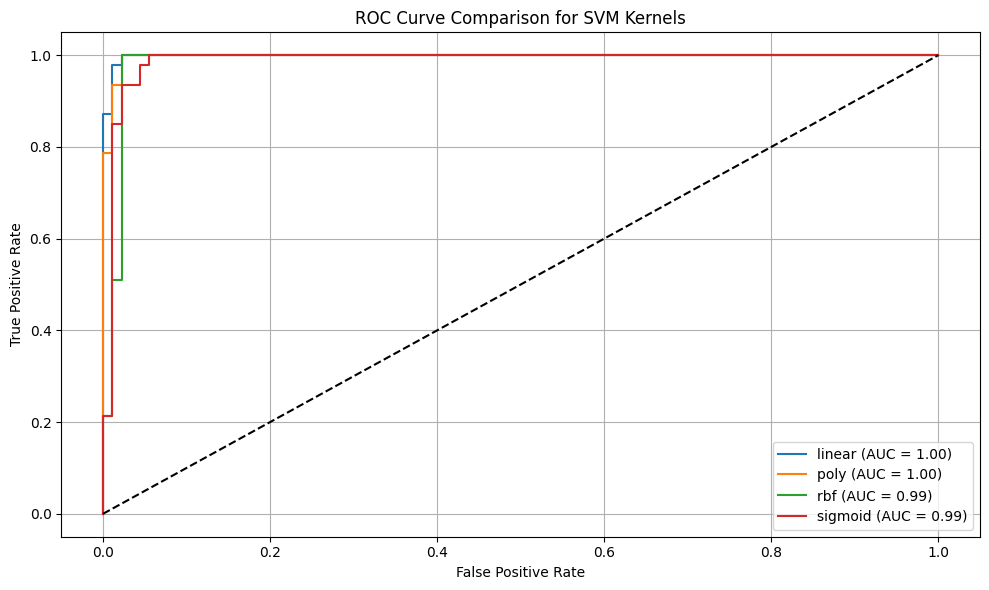

In [ ]:
# Step 7: Plot ROC Curve
plt.figure(figsize=(10, 6))
for kernel in kernels:
    plt.plot(fpr_dict[kernel], tpr_dict[kernel], label=f'{kernel} (AUC = {auc(fpr_dict[kernel], tpr_dict[kernel]):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for SVM Kernels')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()